# Example ConsAggShockModel

In [1]:
from time import process_time
import numpy as np
import matplotlib.pyplot as plt
from HARK.utilities import plot_funcs
from HARK.distribution import DiscreteDistribution
from HARK.ConsumptionSaving.ConsAggShockModel import (
    AggShockConsumerType,
    CobbDouglasEconomy,
    AggShockMarkovConsumerType,
    CobbDouglasMarkovEconomy,
)
from copy import deepcopy


def mystr(number):
    return "{:.4f}".format(number)

In [2]:
# Solve an AggShockConsumerType's microeconomic problem
solve_agg_shocks_micro = False
# Solve for the equilibrium aggregate saving rule in a CobbDouglasEconomy
solve_agg_shocks_market = True
# Solve an AggShockMarkovConsumerType's microeconomic problem
solve_markov_micro = False
# Solve for the equilibrium aggregate saving rule in a CobbDouglasMarkovEconomy
solve_markov_market = False
# Solve a simple Krusell-Smith-style two state, two shock model
solve_krusell_smith = True
# Solve a CobbDouglasEconomy with many states, potentially utilizing the "state jumper"
solve_poly_state = False

### Example implementation of AggShockConsumerType

In [3]:
if solve_agg_shocks_micro or solve_agg_shocks_market:
    # Make an aggregate shocks consumer type
    AggShockExample = AggShockConsumerType()
    AggShockExample.cycles = 0

    # Make a Cobb-Douglas economy for the agents
    EconomyExample = CobbDouglasEconomy(agents=[AggShockExample])
    EconomyExample.make_AggShkHist()  # Simulate a history of aggregate shocks

    # Have the consumers inherit relevant objects from the economy
    AggShockExample.get_economy_data(EconomyExample)

In [4]:
if solve_agg_shocks_micro:
    # Solve the microeconomic model for the aggregate shocks example type (and display results)
    t_start = process_time()
    AggShockExample.solve()
    t_end = process_time()
    print(
        "Solving an aggregate shocks consumer took "
        + mystr(t_end - t_start)
        + " seconds."
    )
    print(
        "Consumption function at each aggregate market resources-to-labor ratio gridpoint:"
    )
    m_grid = np.linspace(0, 10, 200)
    AggShockExample.unpack("cFunc")
    for M in AggShockExample.Mgrid.tolist():
        mMin = AggShockExample.solution[0].mNrmMin(M)
        c_at_this_M = AggShockExample.cFunc[0](m_grid + mMin, M * np.ones_like(m_grid))
        plt.plot(m_grid + mMin, c_at_this_M)
    plt.ylim(0.0, None)
    plt.show()

Now solving for the equilibrium of a Cobb-Douglas economy.  This might take a few minutes...


intercept=-0.33966384051602805, slope=1.102624348735711, r-sq=0.9966224603747357


intercept=-0.49599237141651215, slope=1.1479009506512385, r-sq=0.9947366916205707


intercept=-0.45166864478060875, slope=1.1124057973784136, r-sq=0.9821113562470466


intercept=-0.3840154156210825, slope=1.0841395602960584, r-sq=0.9875705261040257


intercept=-0.3619812815502955, slope=1.0753681485578617, r-sq=0.9905843996750167


intercept=-0.3523090029998183, slope=1.0715656485158442, r-sq=0.9908961093312039


intercept=-0.3480566606673833, slope=1.0699082913395126, r-sq=0.9910154806768872


intercept=-0.3461952993752178, slope=1.0691876132809162, r-sq=0.9910650108743626


intercept=-0.3453850118498396, slope=1.0688755589956198, r-sq=0.9910860802385031


intercept=-0.3450341442894487, slope=1.068741033425316, r-sq=0.9910951040899093


intercept=-0.3448829558954375, slope=1.0686832829276536, r-sq=0.9910989700363702


intercept=-0.344818090063619, slope=1.0686585844571515, r-sq=0.9911006230018382
Solving the "macroeconomic" aggregate shocks model took 231.421875 seconds.
Aggregate savings as a function of aggregate market resources:


c:\users\alujan\github\alanlujan91\hark\HARK\ConsumptionSaving\ConsAggShockModel.py:3197: RuntimeWarning: divide by zero encountered in log
  Aagg = np.exp(self.intercept + self.slope * np.log(Mnow))


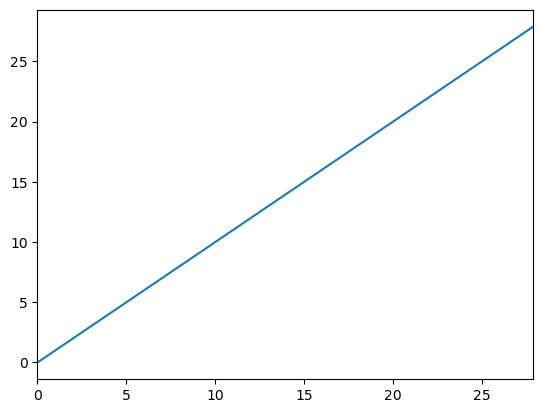

Consumption function at each aggregate market resources gridpoint (in general equilibrium):


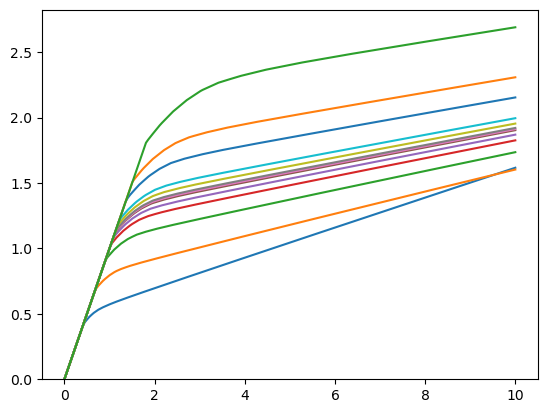

In [5]:
if solve_agg_shocks_market:
    # Solve the "macroeconomic" model by searching for a "fixed point dynamic rule"
    t_start = process_time()
    print(
        "Now solving for the equilibrium of a Cobb-Douglas economy.  This might take a few minutes..."
    )
    EconomyExample.solve()
    t_end = process_time()
    print(
        'Solving the "macroeconomic" aggregate shocks model took '
        + str(t_end - t_start)
        + " seconds."
    )

    print("Aggregate savings as a function of aggregate market resources:")
    plot_funcs(EconomyExample.AFunc, 0, 2 * EconomyExample.kSS)
    print(
        "Consumption function at each aggregate market resources gridpoint (in general equilibrium):"
    )
    AggShockExample.unpack("cFunc")
    m_grid = np.linspace(0, 10, 200)
    AggShockExample.unpack("cFunc")
    for M in AggShockExample.Mgrid.tolist():
        mMin = AggShockExample.solution[0].mNrmMin(M)
        c_at_this_M = AggShockExample.cFunc[0](m_grid + mMin, M * np.ones_like(m_grid))
        plt.plot(m_grid + mMin, c_at_this_M)
    plt.ylim(0.0, None)
    plt.show()

### Example Implementations of AggShockMarkovConsumerType

In [6]:
if solve_markov_micro or solve_markov_market or solve_krusell_smith:
    # Make a Markov aggregate shocks consumer type
    AggShockMrkvExample = AggShockMarkovConsumerType()
    AggShockMrkvExample.IncShkDstn = [2 * [AggShockMrkvExample.IncShkDstn[0]]]
    AggShockMrkvExample.cycles = 0

    # Make a Cobb-Douglas economy for the agents
    MrkvEconomyExample = CobbDouglasMarkovEconomy(agents=[AggShockMrkvExample])
    MrkvEconomyExample.DampingFac = 0.2  # Turn down damping
    MrkvEconomyExample.make_AggShkHist()  # Simulate a history of aggregate shocks
    AggShockMrkvExample.get_economy_data(
        MrkvEconomyExample
    )  # Have the consumers inherit relevant objects from the economy

In [7]:
if solve_markov_micro:
    # Solve the microeconomic model for the Markov aggregate shocks example type (and display results)
    t_start = process_time()
    AggShockMrkvExample.solve()
    t_end = process_time()
    print(
        "Solving an aggregate shocks Markov consumer took "
        + mystr(t_end - t_start)
        + " seconds."
    )

    print(
        "Consumption function at each aggregate market \
            resources-to-labor ratio gridpoint (for each macro state):"
    )
    m_grid = np.linspace(0, 10, 200)
    AggShockMrkvExample.unpack("cFunc")
    for i in range(2):
        for M in AggShockMrkvExample.Mgrid.tolist():
            mMin = AggShockMrkvExample.solution[0].mNrmMin[i](M)
            c_at_this_M = AggShockMrkvExample.cFunc[0][i](
                m_grid + mMin, M * np.ones_like(m_grid)
            )
            plt.plot(m_grid + mMin, c_at_this_M)
        plt.ylim(0.0, None)
        plt.show()

In [8]:
if solve_markov_market:
    # Solve the "macroeconomic" model by searching for a "fixed point dynamic rule"
    t_start = process_time()
    print("Now solving a two-state Markov economy.  This should take a few minutes...")
    MrkvEconomyExample.solve()
    t_end = process_time()
    print(
        'Solving the "macroeconomic" aggregate shocks model took '
        + str(t_end - t_start)
        + " seconds."
    )

    print(
        "Consumption function at each aggregate market \
            resources-to-labor ratio gridpoint (for each macro state):"
    )
    m_grid = np.linspace(0, 10, 200)
    AggShockMrkvExample.unpack("cFunc")
    for i in range(2):
        for M in AggShockMrkvExample.Mgrid.tolist():
            mMin = AggShockMrkvExample.solution[0].mNrmMin[i](M)
            c_at_this_M = AggShockMrkvExample.cFunc[0][i](
                m_grid + mMin, M * np.ones_like(m_grid)
            )
            plt.plot(m_grid + mMin, c_at_this_M)
        plt.ylim(0.0, None)
        plt.show()

In [9]:
if solve_krusell_smith:
    # Make a Krusell-Smith agent type
    # NOTE: These agents aren't exactly like KS, as they don't have serially correlated unemployment
    KSexampleType = deepcopy(AggShockMrkvExample)
    KSexampleType.IncShkDstn[0] = [
        DiscreteDistribution(
            np.array([0.96, 0.04]), np.array([[1.0, 1.0], [1.0 / 0.96, 0.0]])
        ),
        DiscreteDistribution(
            np.array([0.90, 0.10]), np.array([[1.0, 1.0], [1.0 / 0.90, 0.0]])
        ),
    ]

    # Make a KS economy
    KSeconomy = deepcopy(MrkvEconomyExample)
    KSeconomy.agents = [KSexampleType]
    KSeconomy.AggShkDstn = [
        DiscreteDistribution(
            np.array([1.0]),
            np.array([[1.0], [1.05]]),
        ),
        DiscreteDistribution(
            np.array([1.0]),
            np.array([[1.0], [0.95]]),
        ),
    ]
    KSeconomy.PermGroFacAgg = [1.0, 1.0]
    KSexampleType.get_economy_data(KSeconomy)
    KSeconomy.make_AggShkHist()

    # Solve the K-S model
    t_start = process_time()
    print(
        "Now solving a Krusell-Smith-style economy.  This should take about a minute..."
    )
    KSeconomy.solve()
    t_end = process_time()
    print("Solving the Krusell-Smith model took " + str(t_end - t_start) + " seconds.")

Now solving a Krusell-Smith-style economy.  This should take about a minute...


intercept=[-0.5817183825422844, -0.570331941435353], slope=[1.1803079148353923, 1.1824082067172506], r-sq=[0.9975542198241373, 0.9980320884474997]


intercept=[-0.4180260563496855, -0.4131653956481459], slope=[1.0834273589110301, 1.0852799171504517], r-sq=[0.9997337760398891, 0.9993225507148134]


intercept=[-0.3600899736514912, -0.3551201645233749], slope=[1.0714753213364983, 1.0712256905434416], r-sq=[0.9999986714166434, 0.9999961301697307]


intercept=[-0.37883953200059806, -0.37151098173211017], slope=[1.0786573434429674, 1.0774887741894945], r-sq=[0.9999982037028008, 0.9999942754223831]


intercept=[-0.3789601295431742, -0.37156486819095036], slope=[1.0787111353569707, 1.07752415042328], r-sq=[0.9999982049718268, 0.9999940788572954]


intercept=[-0.3789955040701963, -0.37159566602844885], slope=[1.0787232463104637, 1.0775357473879448], r-sq=[0.9999982037318689, 0.9999940713848703]
Solving the Krusell-Smith model took 68.328125 seconds.


In [10]:
if solve_poly_state:
    StateCount = 15  # Number of Markov states
    GrowthAvg = 1.01  # Average permanent income growth factor
    GrowthWidth = 0.02  # PermGroFacAgg deviates from PermGroFacAgg in this range
    Persistence = 0.90  # Probability of staying in the same Markov state
    PermGroFacAgg = np.linspace(
        GrowthAvg - GrowthWidth, GrowthAvg + GrowthWidth, num=StateCount
    )

    # Make the Markov array with chosen states and persistence
    PolyMrkvArray = np.zeros((StateCount, StateCount))
    for i in range(StateCount):
        for j in range(StateCount):
            if i == j:
                PolyMrkvArray[i, j] = Persistence
            elif (i == (j - 1)) or (i == (j + 1)):
                PolyMrkvArray[i, j] = 0.5 * (1.0 - Persistence)
    PolyMrkvArray[0, 0] += 0.5 * (1.0 - Persistence)
    PolyMrkvArray[StateCount - 1, StateCount - 1] += 0.5 * (1.0 - Persistence)

    # Make a consumer type to inhabit the economy
    PolyStateExample = AggShockMarkovConsumerType()
    PolyStateExample.MrkvArray = PolyMrkvArray
    PolyStateExample.PermGroFacAgg = PermGroFacAgg
    PolyStateExample.IncShkDstn[0] = StateCount * [PolyStateExample.IncShkDstn[0]]
    PolyStateExample.cycles = 0

    # Make a Cobb-Douglas economy for the agents
    # Use verbose=False to remove printing of intercept
    PolyStateEconomy = CobbDouglasMarkovEconomy(
        agents=[PolyStateExample], verbose=False
    )
    PolyStateEconomy.MrkvArray = PolyMrkvArray
    PolyStateEconomy.PermGroFacAgg = PermGroFacAgg
    PolyStateEconomy.PermShkAggStd = StateCount * [0.006]
    PolyStateEconomy.TranShkAggStd = StateCount * [0.003]
    PolyStateEconomy.slope_prev = StateCount * [1.0]
    PolyStateEconomy.intercept_prev = StateCount * [0.0]
    PolyStateEconomy.update()
    PolyStateEconomy.makeAggShkDstn()
    PolyStateEconomy.make_AggShkHist()  # Simulate a history of aggregate shocks
    PolyStateExample.get_economy_data(
        PolyStateEconomy
    )  # Have the consumers inherit relevant objects from the economy

    # Solve the many state model
    t_start = process_time()
    print(
        "Now solving an economy with "
        + str(StateCount)
        + " Markov states.  This might take a while..."
    )
    PolyStateEconomy.solve()
    t_end = process_time()
    print(
        "Solving a model with "
        + str(StateCount)
        + " states took "
        + str(t_end - t_start)
        + " seconds."
    )